In [7]:
#Bu verimizle hastanın özelliklerine göre teşhis koyacağız.
#Kütüphaneleri yükleyelim.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#Verimizi pandas ile dataframe'e çevirelim
df = pd.read_csv('knn.csv')

In [9]:
#Verimizi analiz edelim.
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [11]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


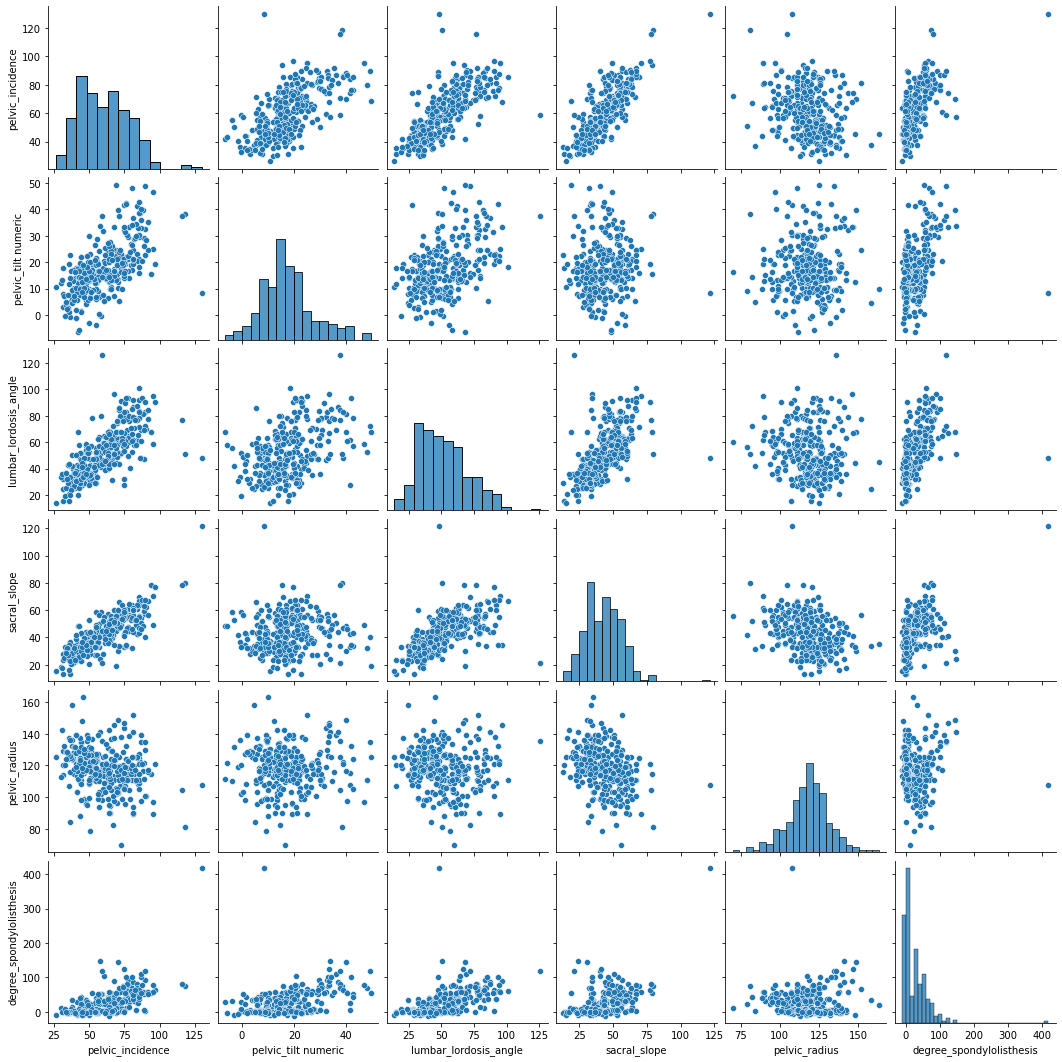

In [12]:
sns.pairplot(df)

In [15]:
#Eğitim verilerimizi hazırlayalım.
X = df.drop('class',axis=1)
y = df['class']

In [16]:
#Train test split'i hazırlayalım.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
#Şimdi modelimizi hazırlayalım.
from sklearn.neighbors import KNeighborsClassifier
#En iyi k değerini bulmak için loop'un içine sokalım.
error_rate = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Error Rate')

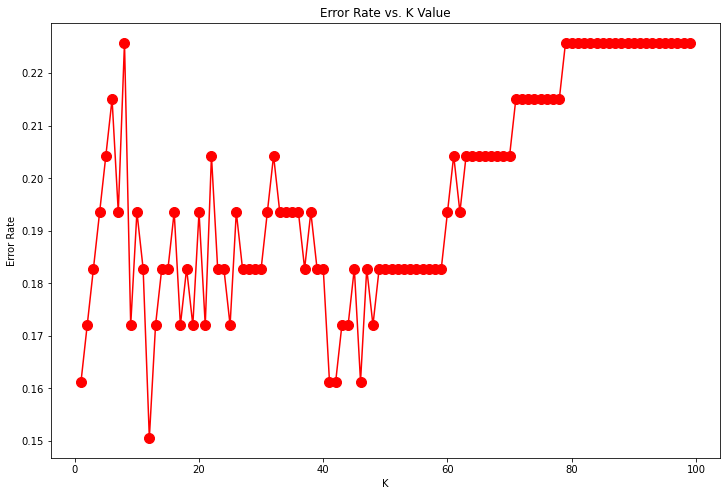

In [21]:
#Şimdi en küçük k değerini grafik üzerinde görelim.
plt.figure(figsize=(12,8))
plt.plot(range(1,100),error_rate,color='red',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
#Şimdi k=11 değerimizi modele yerleştirip modelimizi değerlendirelim.
#En iyi k değerini bulmak için alternatif olarakta daha basitçe şöyle yapılabilir.
error_rate.index(min(error_rate))

11

In [32]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [34]:
#Şimdi modeli değerlendirelim.
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    Abnormal       0.91      0.84      0.87        69
      Normal       0.62      0.75      0.68        24

    accuracy                           0.82        93
   macro avg       0.76      0.80      0.78        93
weighted avg       0.83      0.82      0.82        93



In [36]:
accuracy_score(y_test,pred)

0.8172043010752689